# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

In [48]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read the data
url = "recipe_site_traffic_2212.csv"
df = pd.read_csv(url)
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


# Data Validation and Cleaning

The first step is to understand the structure of the data and identify any issues. Let's start by checking the dimensions, data types, and missing values. <br>
In printing the first few rows, we can see that there are 8 columns: recipe, calories, carbohydrate, sugar, protein, category, servings, and high_traffic. <br>
We can also see that there are missing values in some columns.

The data type of the columns should be:
- recipe: object or int64 (this is already a unique identifier) 
- calories, carbohydrate, sugar, protein, servings: float64
- category: object (string category)
- high_traffic: boolean

Step for cleaning and validating the columns:
- drop the recipe column because it's a unique identifier and not relevant for the analysis
- handle missing values in the calories, carbohydrate, sugar, protein, and servings columns. Check the skewness to decide on an appropriate method (imputation using median).
- convert high_traffic to a numerical column (True -> 1, False -> 0)
- Check for any inconsistencies in the category column (e.g., lowercase or uppercase).

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None


In [50]:
#check number of unique values
df.nunique()

# we can see that recipe has 947 values, indicating that there are no duplicate recipes.

recipe          947
calories        891
carbohydrate    835
sugar           666
protein         772
category         11
servings          6
high_traffic      1
dtype: int64

In [51]:
# However, we can see that there are duplicates in the other columns. Note that the "recipe" column is the name of the recipe and cannot be duplicated. The process in the cooking might be different, having different recipe number for the same recipe.
df.drop("recipe",axis=1).duplicated().sum()

23

In [52]:
# checking servings
print(df.servings.value_counts())
print("Let's clean the servings column by removing the strings and converting them to numbers.")
print("Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.")
df['servings'] = df['servings'].str.extract(r'(\d+)').astype(int)
df.servings.value_counts()

servings
4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: count, dtype: int64
Let's clean the servings column by removing the strings and converting them to numbers.
Here, we can just use subsetting the first character to check if it's a digit, and if so, convert it to a number.


servings
4    391
6    198
2    183
1    175
Name: count, dtype: int64

# Exploratory Analysis
In order to clean the data, we need to check the distribution of the variables, look for outliers, and identify any patterns. This will help us identify what statistical measures to use and whether any preprocessing is needed.

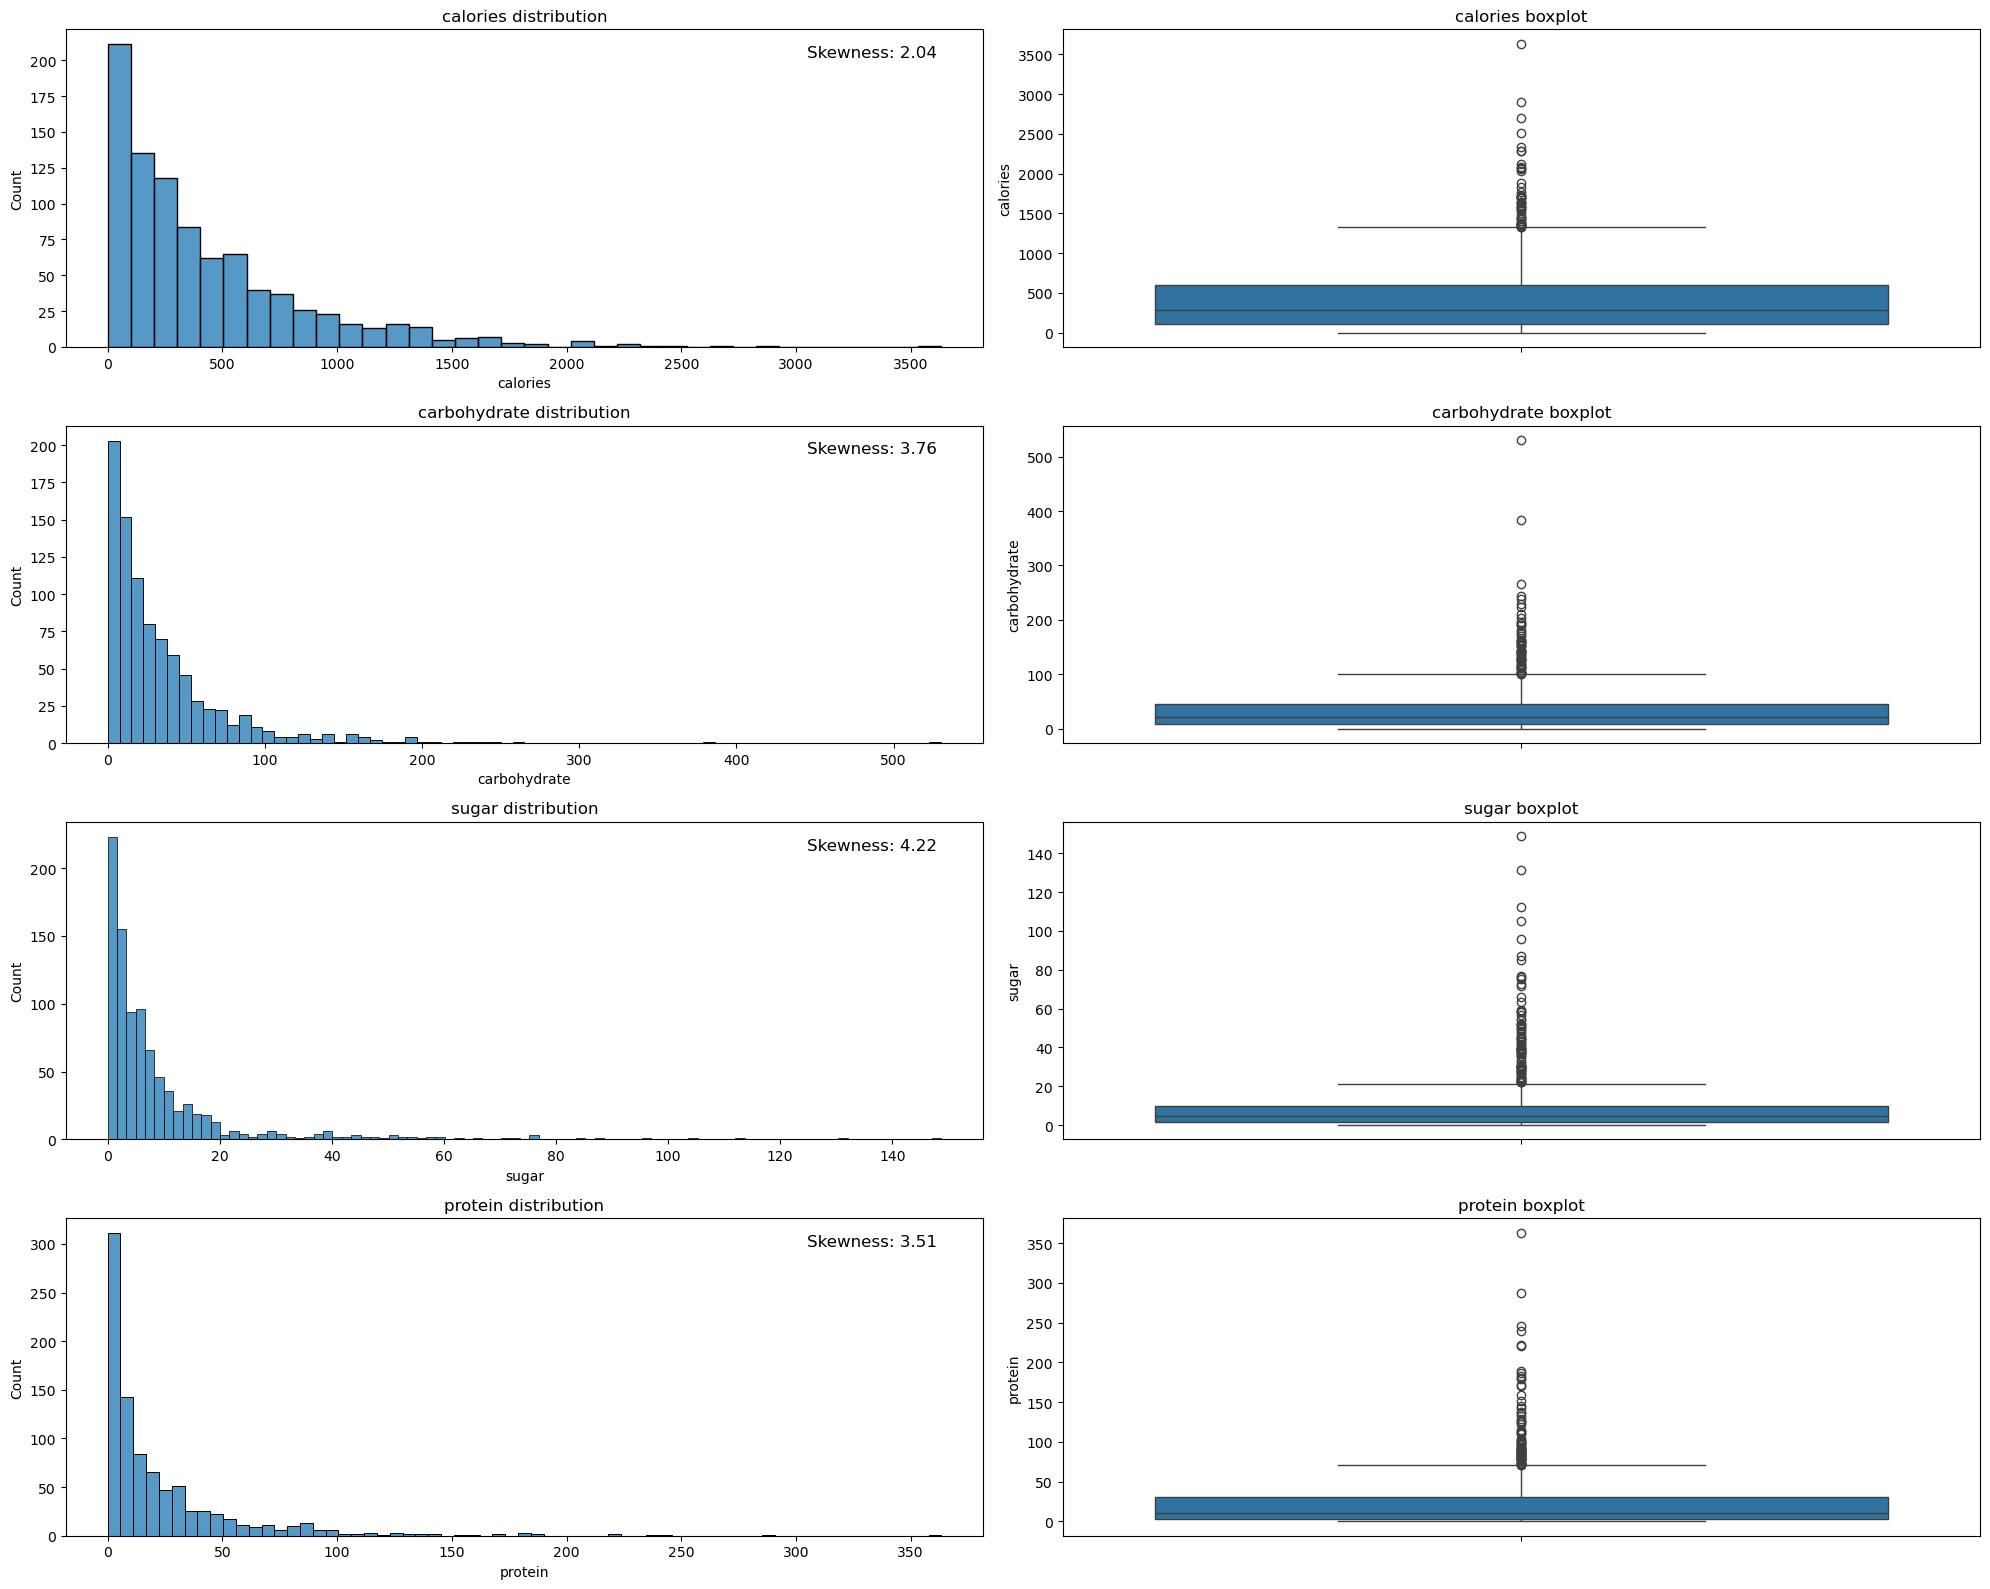

In [53]:
def plot_continuous_variables(df, variables):
    fig, ax = plt.subplots(len(variables), 2, figsize=(20, 4 * len(variables)))
    for i, var in enumerate(variables):
        sns.histplot(df[var], ax=ax[i, 0])
        ax[i, 0].set_title(f'{var} distribution')
        sns.boxplot(df[var], ax=ax[i, 1])
        ax[i, 1].set_title(f'{var} boxplot')
        # annotate skewness
        skewness = df[var].skew()
        ax[i, 0].text(0.95, 0.95, f'Skewness: {skewness:.2f}', transform=ax[i, 0].transAxes, horizontalalignment='right', verticalalignment='top', fontsize=12)
    plt.tight_layout()
    plt.show()

# plot continuous variables
continuous_variables = ['calories', 'carbohydrate', 'sugar', 'protein']
plot_continuous_variables(df, continuous_variables)

## Skewness of the continuous variables
We can see that "calories", "carbohydrate", "sugar", and "protein" columns are right skewed. We can use median imputation for the missing values.

In [54]:
from sklearn.impute import SimpleImputer
def fill_missing_values(df, columns, method='median'):
    for col in columns:
        imputer = SimpleImputer(strategy=method)
        df[col] = imputer.fit_transform(df[[col]])
        print(f'Imputed missing values in {col} using {method} with median value of {df[col].median()}')
        del imputer
fill_missing_values(df, ['calories', 'carbohydrate', 'sugar', 'protein'])

Imputed missing values in calories using median with median value of 288.55
Imputed missing values in carbohydrate using median with median value of 21.48
Imputed missing values in sugar using median with median value of 4.55
Imputed missing values in protein using median with median value of 10.8


In [57]:
df['high_traffic'] = df['high_traffic'] == "High"
df.high_traffic

0       True
1       True
2      False
3       True
4      False
       ...  
942    False
943     True
944     True
945     True
946    False
Name: high_traffic, Length: 947, dtype: bool

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# use Pipeline for the preprocessing and model building
def preprocess_and_build_model(df):
    # create feature matrix and target vector
    X = df.drop(['high_traffic', 'recipe'], axis=1)
    y = df['high_traffic']

    # encode categorical variables
    categorical_columns = ['category']
    encoder = LabelEncoder()
    for col in categorical_columns:
        X[col] = encoder.fit_transform(X[col])

    # scale numerical variables
    numerical_columns = ['calories', 'carbohydrate','sugar', 'protein','servings']
    scaler = StandardScaler()
    X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a pipeline for logistic regression
    pipeline = Pipeline([
        ('model', LogisticRegression(max_iter=1000))
    ])

    # fit the model to the training data
    pipeline.fit(X_train, y_train)

    # make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return pipeline, accuracy, precision, recall, f1

preprocess_and_build_model(df)

(Pipeline(steps=[('model', LogisticRegression(max_iter=1000))]),
 0.7631578947368421,
 0.7931034482758621,
 0.8141592920353983,
 0.8034934497816594)

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation